In [37]:
import csv
import pickle
from dateutil import parser
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
import os
import nltk, re, pprint, string
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import pad_sequence
from nltk.lm import MLE, Laplace
from collections import Counter
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import csv
import os
from sklearn.model_selection import train_test_split
import pickle
import warnings
import re
from datetime import datetime
from dateutil import parser
from sklearn.model_selection import cross_val_score
import pandas as pd  
import pickle
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
def stemmed_words(doc):
    p_stemmer = PorterStemmer()
    analyzer = CountVectorizer().build_analyzer()
    return (p_stemmer.stem(w) for w in analyzer(doc))

In [38]:
    
    #intent recognition classifer 
    
    df = pd.read_csv('/Users/matt/Desktop/intent.csv')
    
    data = df['question']
    labels = df['intent']
    
    

    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels, test_size=0.2, random_state=1)

    count_vect = CountVectorizer(lowercase=True, stop_words=stopwords.words('english'), analyzer=stemmed_words)
    X_train_counts = count_vect.fit_transform(X_train)

    tfidf_transformer = TfidfTransformer(use_idf=True, sublinear_tf=True).fit(X_train_counts)
    X_train_tf = tfidf_transformer.transform(X_train_counts)

    clf = LogisticRegression(random_state=0).fit(X_train_tf, y_train)

    processed_newdata = count_vect.transform(X_test)

    # document-term for training

    # Weighting
    processed_input = tfidf_transformer.transform(processed_newdata)

    prediction = clf.predict(processed_input)
    
 
    
   
    



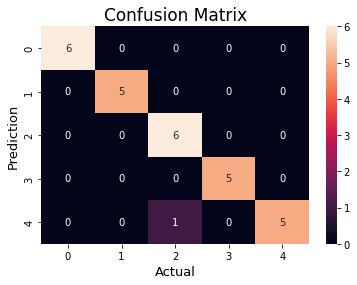

In [39]:
# compute the confusion matrix
cm = confusion_matrix(y_test,prediction )
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 

In [40]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         5
           4       1.00      0.83      0.91         6

    accuracy                           0.96        28
   macro avg       0.97      0.97      0.97        28
weighted avg       0.97      0.96      0.96        28



In [26]:
skf = StratifiedKFold(3,shuffle=True,random_state= 1 )
scores = cross_val_score(clf,processed_input,y_test,cv=skf ,scoring='accuracy')

avg_score = np.mean(scores)
print(avg_score)

0.7851851851851852


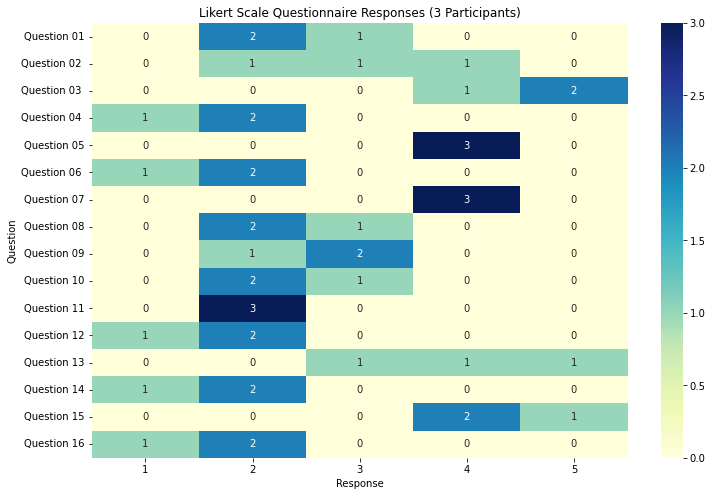

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt


data = {
'Question 01' : [2 , 2 , 3] ,
'Question 02 ': [4 , 2 , 3] ,
'Question 03 ': [4 , 5, 5] ,
 'Question 04 ': [2 , 2 , 1] ,
'Question 05' : [4 , 4, 4] ,
'Question 06 ': [2 , 2, 1] ,
'Question 07' : [4 , 4 , 4] ,
'Question 08' : [2 , 3 , 2] ,
'Question 09' : [3 , 3 , 2] ,
 'Question 10': [3 , 2 , 2] ,
'Question 11' : [2 , 2 , 2] ,
'Question 12' : [2 , 2 , 1] ,
'Question 13' : [3 , 4 , 5] ,
'Question 14' : [2 , 1 , 2] ,
'Question 15' : [4 , 5 , 4] ,
 'Question 16' : [2, 1 , 2]
}

df = pd . DataFrame ( data )


df_long = df.melt( var_name = 'Question' , value_name = 'Response')


response_pivot = df_long.pivot_table( index = 'Question' , columns = 'Response',
aggfunc = len , fill_value =0)


plt.figure(figsize =(12,8))
sns.heatmap(response_pivot , annot = True , cmap = "YlGnBu" , fmt = "d" )
plt.title("Likert Scale Questionnaire Responses (3 Participants)" )
plt . ylabel("Question")
plt . xlabel("Response" )
plt . show ()

In [62]:

import csv
import pickle
from dateutil import parser
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
import os
import nltk, re, pprint, string
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import pad_sequence
from nltk.lm import MLE, Laplace
from collections import Counter
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import csv
import os
from sklearn.model_selection import train_test_split
import pickle
import warnings
import re
from datetime import datetime
from dateutil import parser





test_set = [
{ "question" : "What is the capital of India? " , "correct_answer" : "New Delhi" },
{ "question" : "What is the capital of canada? " , "correct_answer" : "Toronto" },
{ "question" : "What is the capital of England? " , "correct_answer" : "London" },
{ "question" : "What is the capital of US? " , "correct_answer" : "Washington, D.C" },
{ "question" : "capital of turkey" , "correct_answer" : "Ankara" }

]


def stemmed_words(doc):
    p_stemmer = PorterStemmer()
    analyzer = CountVectorizer().build_analyzer()
    return (p_stemmer.stem(w) for w in analyzer(doc))



def Similarity_based_intent(question):
    vect = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), analyzer=stemmed_words, use_idf=True,
                           sublinear_tf=True)

    Questions = []
    Answers = []

    with open('/Users/matt/Desktop/qa.csv', 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for line in csv_reader:
            Questions.append(line['question'])
            Answers.append(line['answer'])

    database = vect.fit_transform(Questions)
    userResponse = vect.transform([question])

    similarities = cosine_similarity(userResponse, database)

    # Find the index of the most similar sentence
    most_similar_index = similarities.argmax()

    # Get the confidence score of the most similar sentence
    similarity_confidence_score = similarities[0, most_similar_index]

    return Answers[most_similar_index]

correct_count = 0
for item in test_set :
    system_answer = Similarity_based_intent( item [ "question" ])
    
    
    if system_answer.strip ().lower () == item [ "correct_answer"].lower () :
        correct_count += 1


accuracy = correct_count/len(test_set)
print ( f"Accuracy:{accuracy:.2f}" )

Accuracy:0.60


In [10]:

    df = pd.read_csv('/Users/matt/Desktop/transactions.csv')
    
    data = df['input']
    labels = df['intent']
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels, test_size=0.2, random_state=1)

    count_vect = CountVectorizer(lowercase=True, stop_words=stopwords.words('english'), analyzer=stemmed_words)
    X_train_counts = count_vect.fit_transform(X_train)

    tfidf_transformer = TfidfTransformer(use_idf=True, sublinear_tf=True).fit(X_train_counts)
    X_train_tf = tfidf_transformer.transform(X_train_counts)

    clf = LogisticRegression(random_state=0).fit(X_train_tf, y_train)
    
    processed_newdata = count_vect.transform(X_test)

    # document-term for training

    # Weighting
    processed_input = tfidf_transformer.transform(processed_newdata)

    prediction = clf.predict(processed_input)
    
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, prediction)
    
    print(score)


1.0
